# Problem Definition and Objectives

## Problem Definition
Predict diamond prices based on features like carat weight, cut, color, clarity, and dimensions using the `diamonds.csv` dataset.

## Objectives
1. **Data Exploration**:
   - Load and inspect the dataset.
   - Visualize correlations and distributions.

2. **Model Building**:
   - Preprocess data and encode categorical variables.
   - Train a Linear Regression model.

3. **Model Evaluation**:
   - Evaluate using MSE and R2.
   - Visualize actual vs. predicted prices.
   - Analyze residuals.

4. **Conclusions**:
   - Summarize key findings and insights.
   - Recommend potential improvements.

# Import Libraries and Load Data

In [1]:
# Import Libraries and Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Correlation Matrix and Distributions

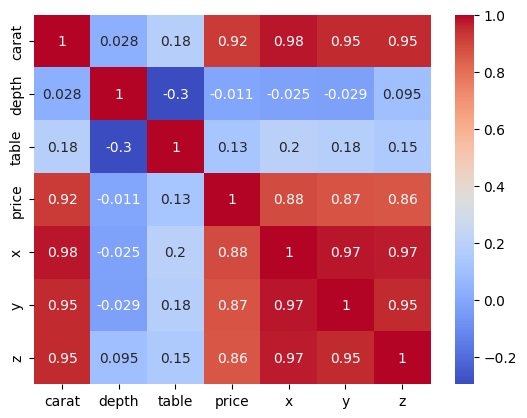

In [3]:
# Correlation Matrix and Distributions
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

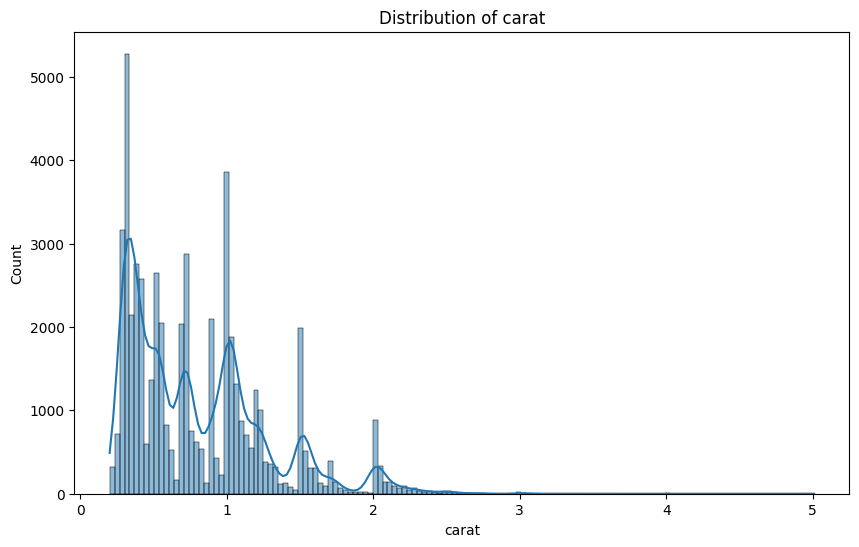

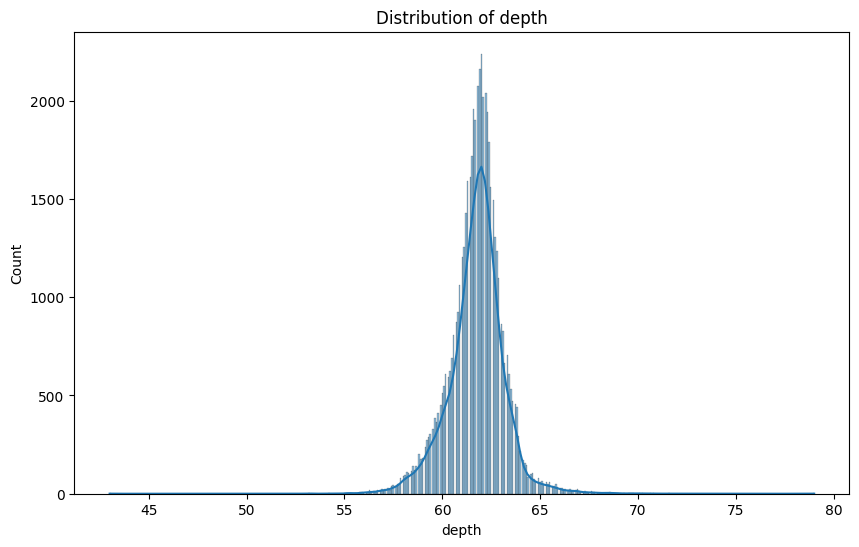

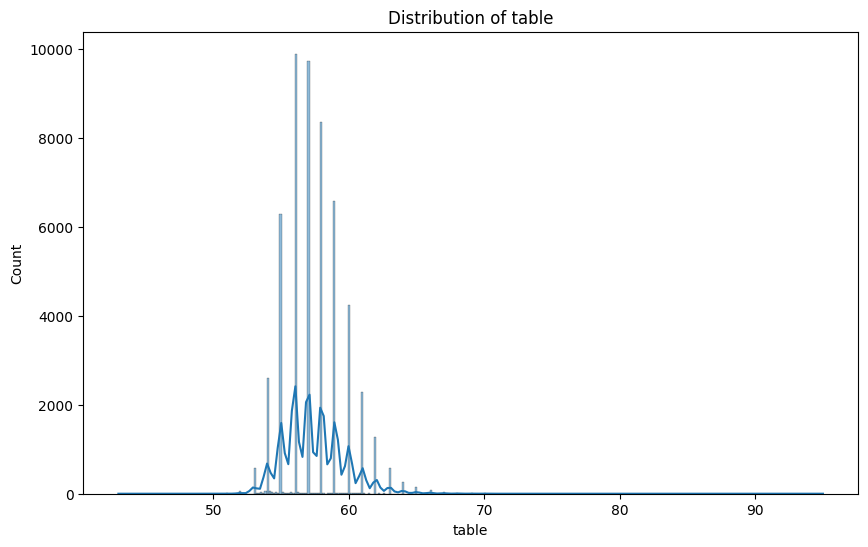

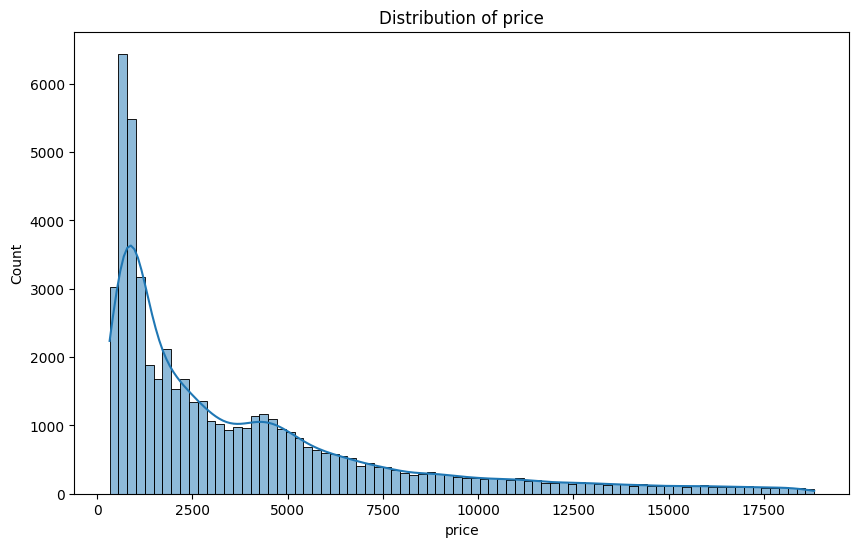

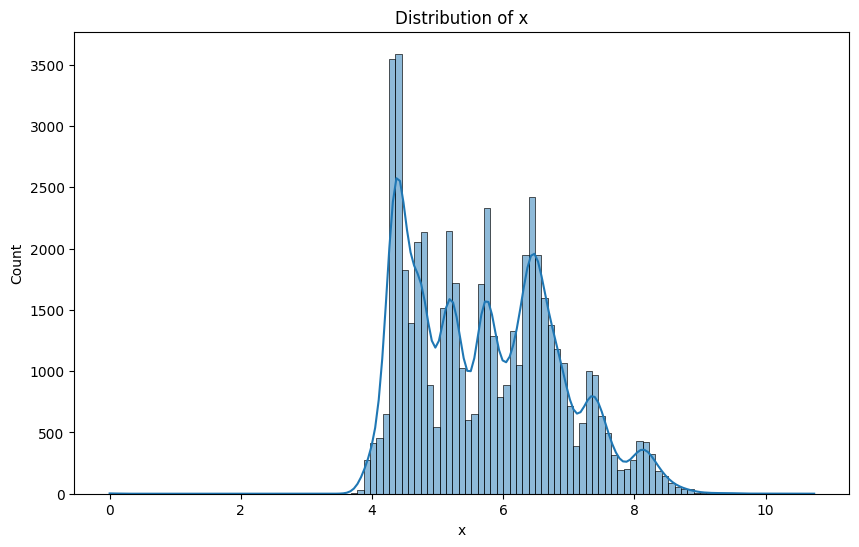

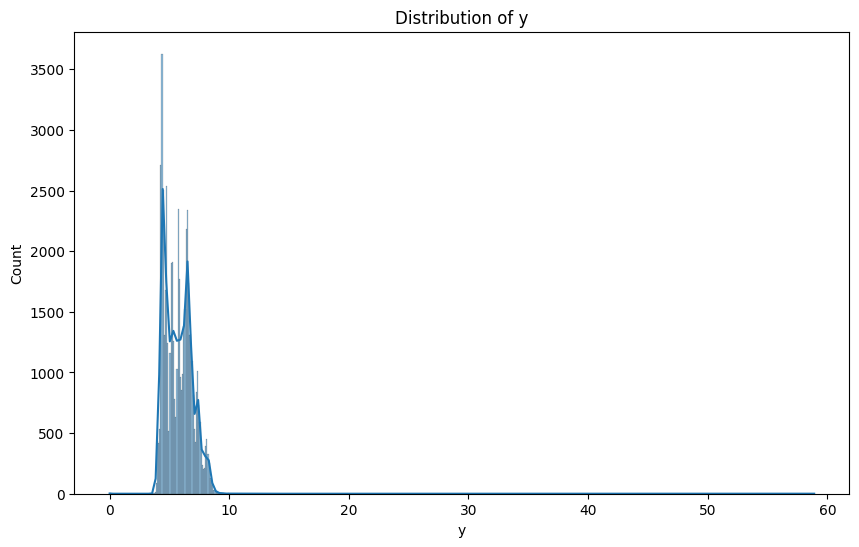

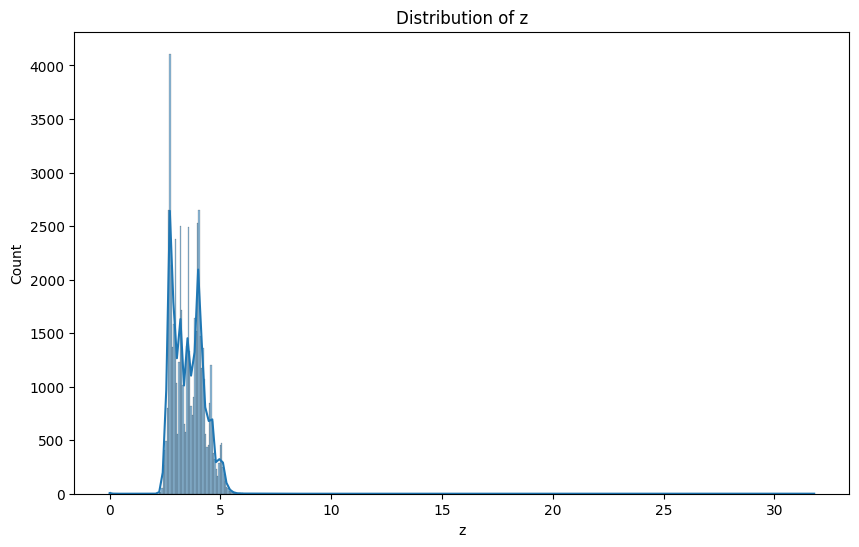

In [4]:
# Plot the distributions of the dataset columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Regression Model

In [5]:
# Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

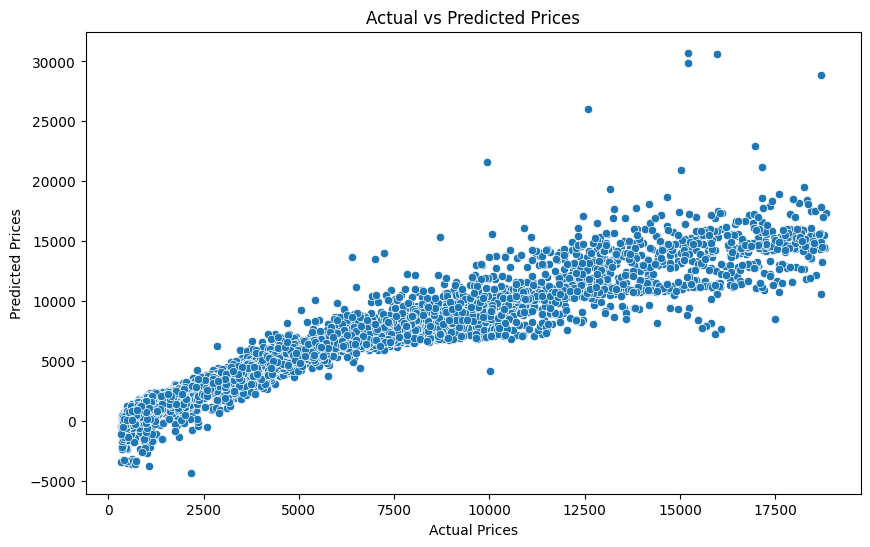

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Model Evaluation

In [7]:
# Model Evaluation
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 1288705.477851677
R2: 0.9189331350419386


# Residual Distribution

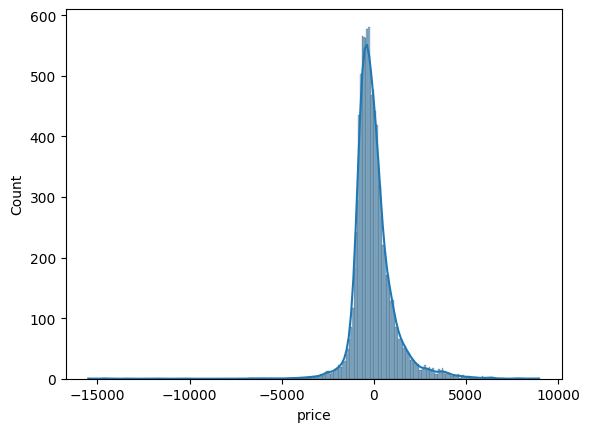

In [8]:
# Residual Distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()

# Conclusions

In [9]:
conclusions = [
    "Carat weight is the most significant predictor of price.",
    "Linear regression captured most of the variance in price.",
    "Outliers in diamond dimensions slightly affected the model's accuracy.",
    "Residuals showed a near-normal distribution, indicating a good model fit.",
    "Improved preprocessing (like scaling) may enhance predictions."
]
print('\n'.join(conclusions))

Carat weight is the most significant predictor of price.
Linear regression captured most of the variance in price.
Outliers in diamond dimensions slightly affected the model's accuracy.
Residuals showed a near-normal distribution, indicating a good model fit.
Improved preprocessing (like scaling) may enhance predictions.
